<a href="https://colab.research.google.com/github/jhlee508/sparta-pytorch/blob/master/week2/week2_sparta_pytorch_5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Softmax Regression with MNIST Dataset

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import random
import matplotlib.pyplot as plt

In [2]:
USE_CUDA = torch.cuda.is_available() # GPU 사용
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습:", device)

다음 기기로 학습: cuda


In [4]:
# for Reproducibility(재현성)
random.seed(777)
torch.manual_seed(777)

if device == "cuda":
    torch.cuda.manual_seed_all(777)

In [5]:
# hyperparameters
training_epochs = 15
batch_size = 100

In [6]:
# MNIST Dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True, # 60000장
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False, # 10000장
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [18]:
# DataLoader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, 
                         shuffle=True,
                         drop_last=True) # 남아있는 작은 Minibatch의 과대평가를 방지

In [19]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device) # GPU로 올리기

In [20]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 Softmax 함수를 내포
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [21]:
60000 // 100

600

In [22]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader) # 60000 // batch_size = 100

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        # cost 계산
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Training finished')

Epoch: 0001 cost = 0.533538759
Epoch: 0002 cost = 0.358977467
Epoch: 0003 cost = 0.331103832
Epoch: 0004 cost = 0.316290468
Epoch: 0005 cost = 0.306467384
Epoch: 0006 cost = 0.299979955
Epoch: 0007 cost = 0.294786423
Epoch: 0008 cost = 0.290565252
Epoch: 0009 cost = 0.287176818
Epoch: 0010 cost = 0.284291983
Epoch: 0011 cost = 0.281694949
Epoch: 0012 cost = 0.279518574
Epoch: 0013 cost = 0.277389795
Epoch: 0014 cost = 0.275903255
Epoch: 0015 cost = 0.274181485
Training finished


In [17]:
# 테스트 데이터 전체를 사용하여 모델을 테스트한다.
with torch.no_grad(): # gradient 계산을 수행하지 않음
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    
    print('Accuracy:', accuracy.item())

Accuracy: 0.8704999685287476


Label:  1
Prediction:  1


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


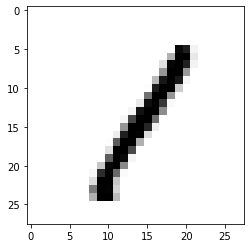

In [30]:
# MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
with torch.no_grad():
    r = random.randint(0, len(mnist_test) - 1) # 0 ~ 10000 사이의 무작위 숫자
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()